<div style="text-align:left;font-size:2em"><span style="font-weight:bolder;font-size:1.25em">SP2273 | Learning Portfolio</span><br><br><span style="font-weight:bold;color:darkred">Random Numbers (Good)</span></div>

## 1 Random numbers from other distributions

### 1.1 Random numbers from the Normal distribution

In [1]:
np.random.normal(loc=5, scale=2, size=10)

# Function used to draw random numbers from a normal distribution. loc specifies the mean, scale specifies the sd

array([ 4.87116841,  7.92136826,  5.55177231,  2.14616448,  8.57067274,
        3.48022957, -0.15807328,  5.10822715,  9.59508449,  3.85241854])

### 1.2 Visualising the random numbers

Text(0, 0.5, 'Value of random number')

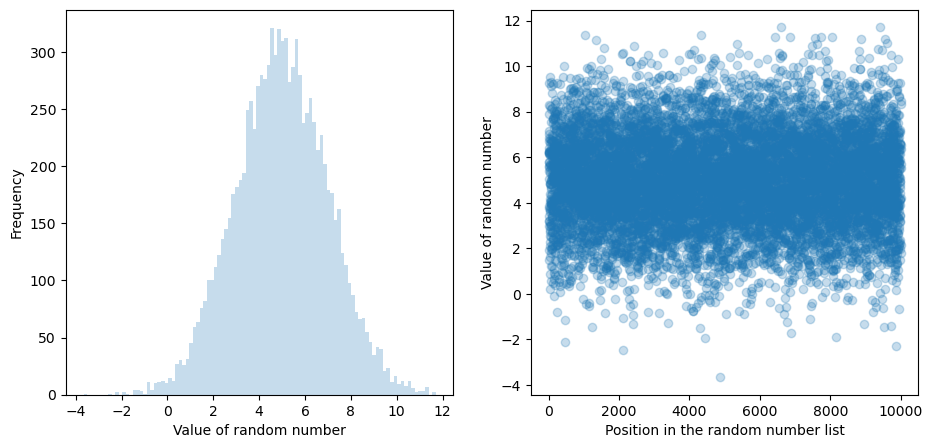

In [5]:
from matplotlib import pyplot as plt

n = 1_000_0
random_numbers = np.random.normal(loc=5, scale=2, size=n)

fig, ax = plt.subplots(nrows=1, ncols=2, figsize=(11, 5))

axis = ax[0]
axis.hist(random_numbers, bins=100, alpha=.25)
axis.set_xlabel("Value of random number")
axis.set_ylabel("Frequency")

axis = ax[1]
axis.scatter(range(n), random_numbers, alpha=.25)
axis.set_xlabel("Position in the random number list")
axis.set_ylabel("Value of random number")

# Distribution now follows a normal distribution curve.

### 1.3 68%?

In [6]:
n = 10_000
mean, sd = 5, 2
random_numbers = np.random.normal(loc=mean, scale=sd, size=n)

mask = (random_numbers >= mean - sd) & (random_numbers <= mean + sd)

print(f'% of points between 1 std.dev. from the mean: {np.sum(mask)/n*100:.2f}%')

% of points between 1 std.dev. from the mean: 68.07%


## 1 Brownian Motion in 1D

### 1.1 The scenario

Simulating the random walk of a particle on a 1D line. i.e. at any point in time, the particle will randomly decide whether to go left or right.

### 1.2 The simulation

In [17]:
def brown_1d(prob_right=.5, no_of_steps=10000):
    ''' 
        This function returns the final position of the particle 
        after the number of steps.
        prob_right is the probability of going right.
    '''

    step_size = 1    
    x = 0                               # starting x position

    for _ in range(no_of_steps):
        if rnd.random() < prob_right:   # Go right?
            x += step_size
        else:
            x -= step_size

    return x

import numpy.random as rnd

brown_1d()

-50

Text(0.5, 1.0, 'Probability distribution for 1D Random walk with p=0.5')

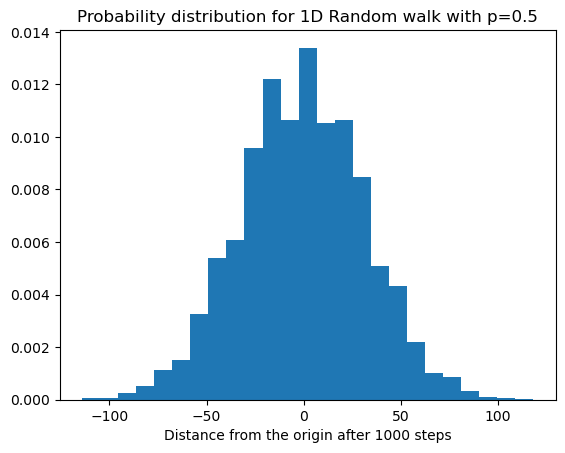

In [18]:
no_of_steps, p = 1_000, .5
repeats = 10_000
results = [brown_1d(prob_right=p, no_of_steps=no_of_steps)
           for _ in range(repeats)]

plt.hist(results, bins=25, density=True)
plt.xlabel(f'Distance from the origin after {no_of_steps} steps')
plt.title(f'Probability distribution for 1D Random walk with p={p}')

Text(0.5, 1.0, 'Probability distribution for 1D Random walk with p=0.6')

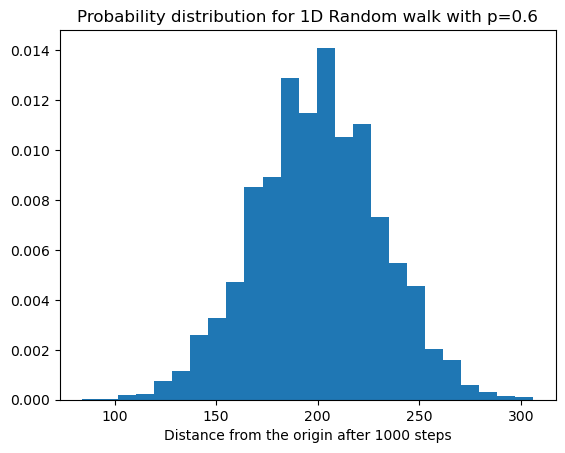

In [20]:
no_of_steps, p = 1_000, .6
repeats = 10_000
results = [brown_1d(prob_right=p, no_of_steps=no_of_steps)
           for _ in range(repeats)]

plt.hist(results, bins=25, density=True)
plt.xlabel(f'Distance from the origin after {no_of_steps} steps')
plt.title(f'Probability distribution for 1D Random walk with p={p}')

# The entire graph has shifted right towards a positive-leaning endpoint since probability of moving right was increased
# to 0.6

### 1.3 What does theory say?

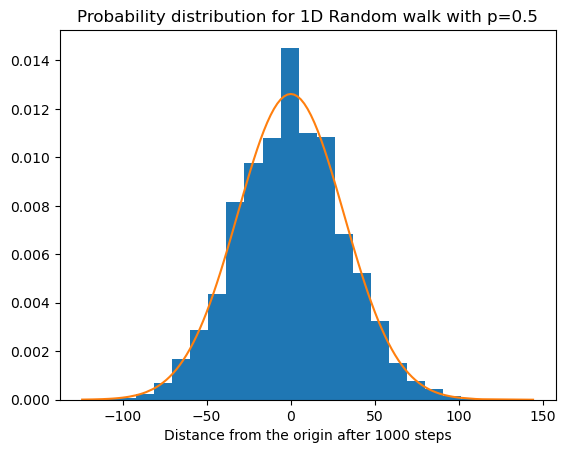

In [23]:
no_of_steps, p = 1_000, .5
repeats = 10_000
results = [brown_1d(prob_right=p, no_of_steps=no_of_steps)
           for _ in range(repeats)]

plt.hist(results, bins=25, density=True)
plt.xlabel(f'Distance from the origin after {no_of_steps} steps')
plt.title(f'Probability distribution for 1D Random walk with p={p}')

def normal(x, m=0, s=1):
    '''
    Probability density function for the
    Gaussian distribution.
    '''
    s2 = s**2
    output = np.exp(-(x-m)**2/(2*s2))
    output /= np.sqrt(2*np.pi*s2)
    return output

prob_left = 1 - prob_right                       # q = 1 -p
mean = no_of_steps * (prob_right - prob_left)    # mean = N(p - q)
sd = np.sqrt(4*no_of_steps*prob_right*prob_left) # sd = sqrt(4 N p q)
x = np.unique(results)                           # Numbers that form 
                                                 # the x-axis
plt.plot(x, normal(x, mean, sd), label='Theoretical')

## 2 Estimating \($\pi\$)

### 2.1 The method

We can use randomly generated numbers to estimate the value of pi by calculating the number of points which end up landing on the circle divided by the total number of points

### 2.2 A poor but intuitive solution

In [26]:
N_total = 100_000                             # Yes, Python allows the _
N_green = 0

for _ in range(N_total):
    x = rnd.uniform(low=-1, high=1, size=1)     
    y = rnd.uniform(low=-1, high=1, size=1)
    r = np.sqrt(x**2 + y**2)                   # Distance from the origin

    if r <= 1:
        N_green += 1                           # In or out of the circle

4 * N_green / N_total                          # Estimate for pi

# Takes very long to load since we are going through one number at a time

3.14136

### 2.3 A better solution

In [27]:
N_total=1_000_000
x=rnd.uniform(low=-1, high=1, size=N_total)      # Size specifies the number of points to output
y=rnd.uniform(low=-1, high=1, size=N_total)
N_green= np.sum((x**2+y**2) <= 1)                # Oh! the ease of NumPy!

4 * (N_green / N_total)

3.142056

### 2.4 A smarter solution

In [28]:
N_total=1_000_000
x=rnd.rand(N_total)       # Limiting the range for x and y to 0 and 1 allows the equation to remain the same
y=rnd.rand(N_total)
N_green=np.sum((x**2+y**2) <= 1)

4 * (N_green / N_total)

3.145264

## Exercise 1 :  Vital Stats of Random π

In [91]:
import numpy as np

def estimate_pi(N_total):
    x=rnd.rand(N_total)
    y=rnd.rand(N_total)
    N_green=np.sum((x**2+y**2) <= 1)
    return 4 * (N_green / N_total)

means = np.array([])
sds = np.array([])

# pi_101 = np.array[estimate_pi(10000) for _ in range(100)]
# pi_102 = np.array[estimate_pi(10000) for _ in range(10**2)]
# pi_103 = np.array[estimate_pi(10000) for _ in range(10**3)]
# pi_104 = np.array[estimate_pi(10000) for _ in range(10**4)]
# pi_105 = np.array[estimate_pi(10000) for _ in range(10**5)]

n = [10**1, 10**2, 10**3, 10**4, 10**5]

def repeat_calc(n):
    values = [estimate_pi(n) for _ in range(100)]
    means = np.mean(values)
    sds = np.std(values)
    return means, sds
    
mean_pi = []
sd_pi = []

for num in n:
    calc = repeat_calc(num)
    mean_pi.append(calc[0])
    sd_pi.append(calc[1])
    
print(mean_pi)
print(sd_pi)

[3.2359999999999998, 3.1211999999999995, 3.1381200000000002, 3.140748, 3.1410744]
[0.5279242369886044, 0.14427251990590584, 0.05058523104622537, 0.013715002588406591, 0.005201396797015213]


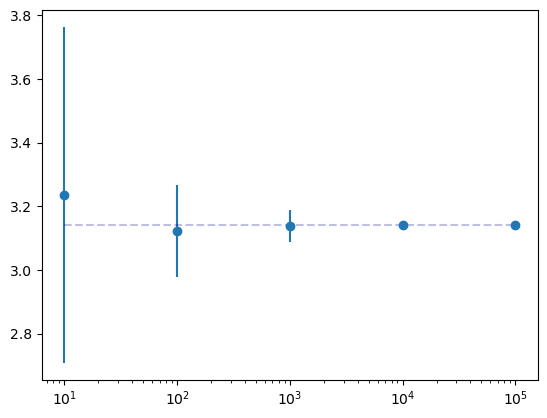

In [92]:
# Plotting

plt.errorbar(n, mean_pi, yerr=sd_pi, linestyle='', fmt='o')
plt.hlines(np.pi, 10**1, 10**5, linestyle='--', color='darkblue', alpha=0.25)
plt.xscale('log')
plt.show()